section 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
None
       Relative_Compactness  Surface_Area   Wall_Area   Roof_Area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167  

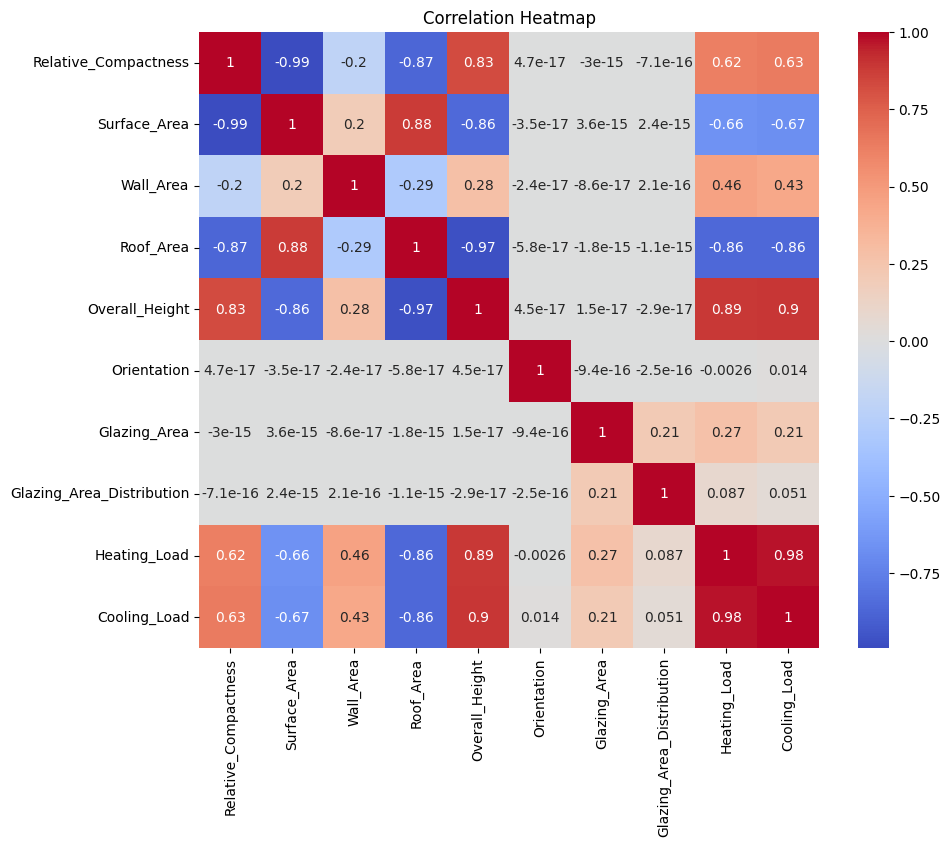

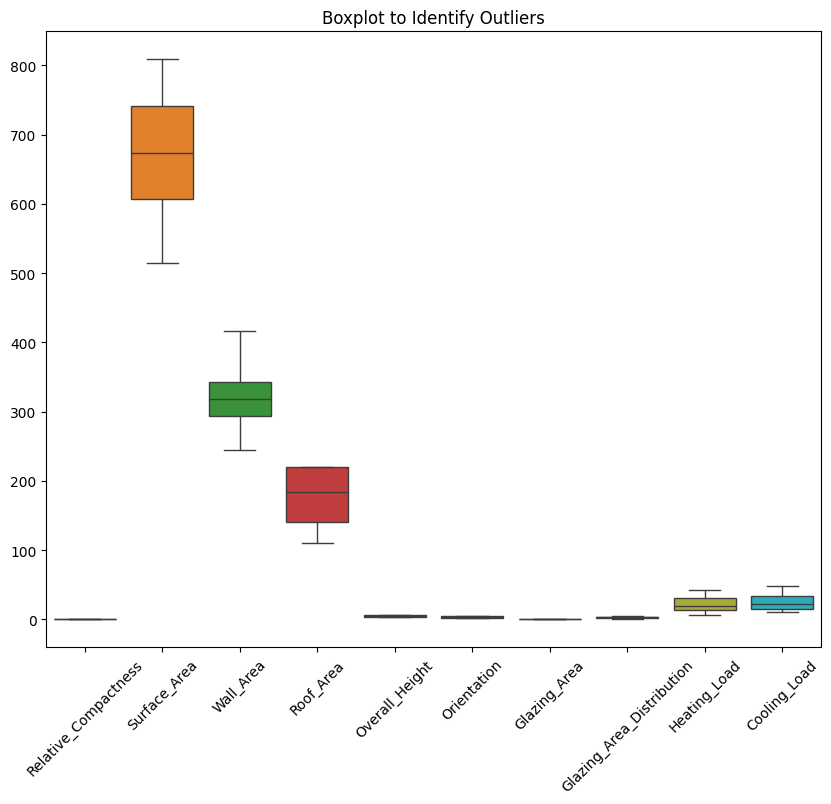

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path='./ENB2012_data.xlsx'
dataset = pd.read_excel(file_path)

dataset.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
                   'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution',
                   'Heating_Load', 'Cooling_Load']

print(dataset.info())
print(dataset.describe())

#missing values
print("Missing values:\n", dataset.isnull().sum())

plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=dataset)
plt.title("Boxplot to Identify Outliers")
plt.xticks(rotation=45)
plt.show()

section 2 solution

In [2]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = dataset[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
             'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution']]
y = dataset['Heating_Load']

# Trainand test with spliting in  (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (614, 8)
Testing data shape: (154, 8)


section 3 part a 

In [16]:
# Linear regression 
X_train_np = np.hstack([np.ones((X_train.shape[0], 1)), X_train.values])
X_test_np = np.hstack([np.ones((X_test.shape[0], 1)), X_test.values])

# Calculate weights using Normal Equation:
theta = np.linalg.inv(X_train_np.T @ X_train_np) @ X_train_np.T @ y_train.values


y_pred_scratch = X_test_np @ theta


section 3 part b:

In [17]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)


section 4

Manual Linear Regression Performance:
R2 Score: -26.0255
Mean Squared Error: 2816.9361
Root Mean Squared Error: 53.0748

Sklearn Linear Regression Performance:
R2 Score: 0.9122
Mean Squared Error: 9.1532
Root Mean Squared Error: 3.0254

Ridge Regression Performance:
R2 Score: 0.9074
Mean Squared Error: 9.6535
Root Mean Squared Error: 3.1070

Lasso Regression Performance:
R2 Score: 0.9065
Mean Squared Error: 9.7429
Root Mean Squared Error: 3.1214



C:\Users\ARITRA SARKAR\AppData\Local\Temp\ipykernel_5756\1731318443.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")


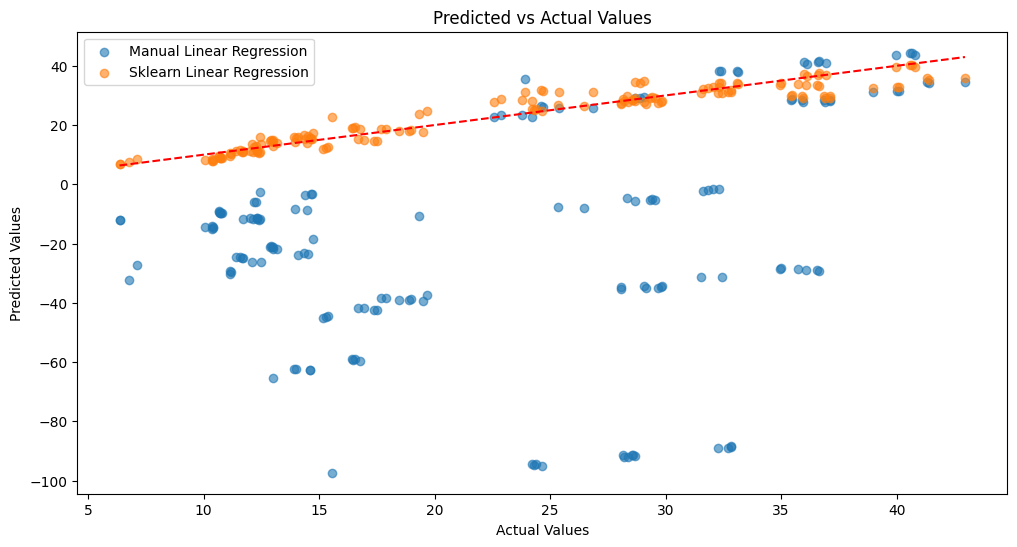

In [18]:
from sklearn.metrics import r2_score, mean_squared_error

# evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{model_name} Performance:")
    print(f"R2 Score: {r2:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}\n")
    return r2, mse, rmse

# evaluate the models
evaluate_model(y_test, y_pred_scratch, "Manual Linear Regression")
evaluate_model(y_test, y_pred_lr, "Sklearn Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

# predicted vs actual
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_scratch, alpha=0.6, label="Manual Linear Regression")
plt.scatter(y_test, y_pred_lr, alpha=0.6, label="Sklearn Linear Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color="red")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Predicted vs Actual Values")
plt.show()


section 5

In [19]:
#improvement suggestion 
coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": lr_model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("Feature Importance:\n", coefficients)

Feature Importance:
                      Feature  Coefficient
6               Glazing_Area    20.143192
4             Overall_Height     4.123669
7  Glazing_Area_Distribution     0.211103
2                  Wall_Area     0.037553
5                Orientation    -0.032439
3                  Roof_Area    -0.048829
1               Surface_Area    -0.060105
0       Relative_Compactness   -61.873354
